<a href="https://colab.research.google.com/github/Misha-private/Demo-repo/blob/main/New_calibration_method1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install sympy_plot_backends[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Fo

# Target: A "fat tail" composition of 3 Gaussians

sigma = 32
sigma1 = 22.4
sigma2 = 44.8
sigma3 = 89.6
sigma_all=52.26666666666666
192.2785559555255


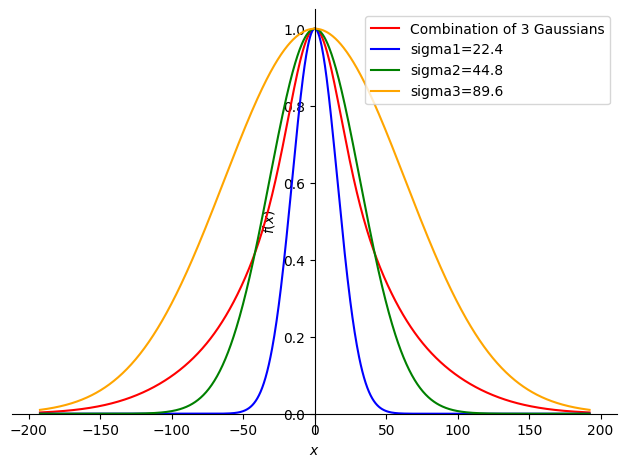

In [3]:
import numpy as np
from sympy import *
from sympy.plotting import plot

x = symbols('x')

gauss1 = symbols('gauss1')
gauss2 = symbols('gauss2')
gauss3 = symbols('gauss3')
guss_all = symbols('guss_all')

sigma = symbols('sigma')
sigma1 = symbols('sigma1')
sigma2 = symbols('sigma2')
sigma3 = symbols('sigma3')

hzcale = [0.7, 1.4, 2.8]

''' Ratio of analysis and filter grid: an_to_filt'''

an_to_filt = 1

''' sf_h, lev = 65'''

sigma = 32 * an_to_filt

sigma1 = sigma*hzcale[0]
sigma2 = sigma*hzcale[1]
sigma3 = sigma*hzcale[2]

sigma_all = (sigma1 + sigma2 + sigma3)/3.

print(f'sigma = {sigma}')
print(f'sigma1 = {sigma1}')
print(f'sigma2 = {sigma2}')
print(f'sigma3 = {sigma3}')
print(f'sigma_all={sigma_all}')

gauss1 = exp(-(x/sigma1)**2)
gauss2 = exp(-(x/sigma2)**2)
gauss3 = exp(-(x/sigma3)**2)

gauss_all = (gauss1 + gauss2 + gauss3)/3.

xB3 = sigma3* np.sqrt(np.log(100))

print(xB3)

p = plot(gauss_all,(x,-xB3,xB3), legend=True, show=False)
p[0].line_color = 'red'
p[0].label = 'Combination of 3 Gaussians'

p.extend( plot(gauss1,(x,-xB3,xB3), legend=True, show=False) )
p[1].line_color = 'blue'
p[1].label = f'sigma1={sigma1}'

p.extend( plot(gauss2,(x,-xB3,xB3), legend=True, show=False) )
p[2].line_color = 'green'
p[2].label = f'sigma2={sigma2}'

p.extend( plot(gauss3,(x,-xB3,xB3), legend=True, show=False) )
p[3].line_color = 'orange'
p[3].label = f'sigma3={sigma3}'



p.show()

# MGBF emulation using Gaussians


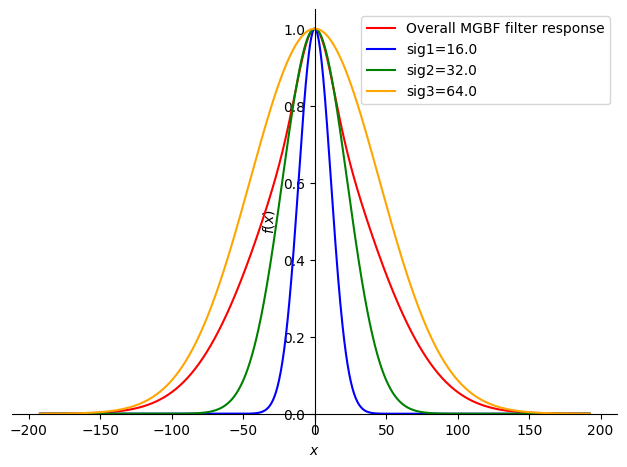

In [22]:
import numpy as np
from sympy import *
from sympy.plotting import plot


x = symbols('x')

s = symbols('s')
s1 = symbols('s1')
s2 = symbols('s2')
s3 = symbols('s3')

gmgbf1 = symbols('gmgbf1')
gmgbf2 = symbols('gmgbf2')
gmgbf3 = symbols('gmgbf3')
gmgbf_all = symbols('gmgbf_all')

gen = [0.5, 1., 2.]

s = 32 * an_to_filt
s1 = s*gen[0]
s2 = s*gen[1]
s3 = s*gen[2]


w = [0.21990904259023744,0.13561580051533134,0.6444751568944312 ]

gmgbf1 = exp(-(x/s1)**2)
gmgbf2 = exp(-(x/s2)**2)
gmgbf3 = exp(-(x/s3)**2)

gmgbf_all = w[0]*gmgbf1 + w[1]*gmgbf2 + w[2]*gmgbf3

p = plot(gmgbf_all,(x,-xB3,xB3), legend=True, show=False)
p[0].line_color = 'red'
p[0].label = 'Overall MGBF filter response'

p.extend( plot(gmgbf1,(x,-xB3,xB3), legend=True, show=False) )
p[1].line_color = 'blue'
p[1].label = f'sig1={s1}'

p.extend( plot(gmgbf2,(x,-xB3,xB3), legend=True, show=False) )
p[2].line_color = 'green'
p[2].label = f'sig2={s2}'

p.extend( plot(gmgbf3,(x,-xB3,xB3), legend=True, show=False) )
p[3].line_color = 'orange'
p[3].label = f'sig3={s3}'

p.show()

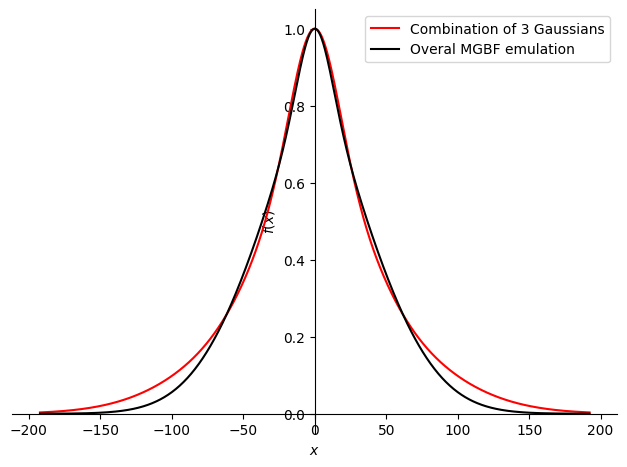

In [23]:
p = plot(gauss_all,(x,-xB3,xB3), legend=True, show=False)
p[0].line_color = 'red'
p[0].label = 'Combination of 3 Gaussians'

p.extend( plot(gmgbf_all,(x,-xB3,xB3), legend=True, show=False) )
p[1].line_color = 'black'
p[1].label = 'Overal MGBF emulation'

p.show()